In [ ]:
import os

os.environ["JAX_PLATFORMS"] = "cpu"
os.environ["JAX_ENABLE_X64"] = "True"


In [1]:
from bpd.io import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

from bpd.io import save_dataset

# Want to standardize first

But also don't want to rerun things

## Exp 70

In [247]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_plus.npy"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_minus.npy"
gp = np.load(fpath1)
gm = np.load(fpath2)
gp.shape, gm.shape

((3000, 2), (3000, 2))

In [248]:
new_fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_plus.npz"
new_fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_minus.npz"

save_dataset({'samples':{'g1': gp[:,0], 'g2': gp[:, 1]}}, new_fpath1, overwrite=True)
save_dataset({'samples':{'g1': gm[:,0], 'g2': gm[:, 1]}}, new_fpath2, overwrite=True)

In [245]:
fpath3 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_514_errs_old.npz"
new_fpath3 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_514_errs.npz"
ds = load_dataset(fpath3)
g_plus  = ds['g_plus']
g_minus = ds['g_minus']
sigma_e = ds['sigma_e']
sigma_e_int = ds['sigma_e_int']
save_dataset(
    {
        "plus": {"g1": g_plus[:, :, 0], "g2": g_plus[:, :, 1]},
        "minus": {"g1": g_minus[:, :, 0], "g2": g_minus[:, :, 1]},
        "sigma_e": sigma_e,
        "sigma_e_int": sigma_e_int,
    },
    new_fpath3,
    overwrite=False,
)

## Exp 71

In [15]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/shear_samples_512_plus.npz"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/shear_samples_512_minus.npz"
fpath3 = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/g_samples_514_errs_old.npz"
new_fpath3 = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/g_samples_514_errs.npz"

In [16]:
ds1 = load_dataset(fpath1)
ds1['samples'].keys()

dict_keys(['g1', 'g2', 'sigma_e'])

In [18]:
ds3 = load_dataset(fpath3)
ds3['plus']['g'].shape, ds3['plus']['sigma_e'].shape, 

((500, 1000, 2), (500, 1000))

In [19]:
ds3_new = {
    'plus':{'g1': ds3['plus']['g'][:, :, 0], 'g2': ds3['plus']['g'][:, :, 1], 'sigma_e': ds3['plus']['sigma_e']},
    'minus':{'g1': ds3['minus']['g'][:, :, 0], 'g2': ds3['minus']['g'][:, :, 1], 'sigma_e': ds3['minus']['sigma_e']}
}
save_dataset(ds3_new, new_fpath3, overwrite=True)

## Exp 72

In [26]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npy"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_minus.npy"
fpath3 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_514_errs_old.npz"

new_fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npz"
new_fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_minus.npz"
new_fpath3 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_514_errs.npz"

In [27]:
gp = np.load(fpath1) 
gm = np.load(fpath2)
gp.shape, gm.shape

((3000, 2), (3000, 2))

In [32]:
ds1 = {'samples':{'g1': gp[:, 0], 'g2': gp[:, 1]}}
ds2 = {'samples':{'g1': gm[:, 0], 'g2': gm[:, 1]}}

save_dataset(ds1, new_fpath1, overwrite=True)
save_dataset(ds2, new_fpath2, overwrite=True)

In [33]:
ds3 = load_dataset(fpath3)
ds3['gp'].shape

(500, 1000, 2)

In [34]:
new_ds3 = {'plus':{'g1': ds3['gp'][:, :, 0], 'g2': ds3['gp'][:, :, 1]}, 
           'minus':{'g1': ds3['gm'][:, :, 0], 'g2': ds3['gm'][:, :, 1]}
          }
save_dataset(new_ds3, new_fpath3)

## Exp 73

In [37]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_plus.npz"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_minus.npz"
fpath3 = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/g_samples_514_errs_514.npz"

In [39]:
ds = load_dataset(fpath3)

dict_keys(['minus', 'plus'])

In [40]:
ds['plus'].keys()

dict_keys(['mean_logflux', 'sigma_loghlr', 'g2', 'mean_loghlr', 'g', 'g1', 'a_logflux', 'sigma_logflux', 'sigma_e'])

# Means comparison

## Exp 70

In [136]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_512_plus.npy"

In [145]:
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp70_51/g_samples_514_errs.npz"

In [146]:
gp = np.load(fpath1)
gp.shape

(3000, 2)

In [147]:
ds = load_dataset(fpath2)
ds.keys()

dict_keys(['g_plus', 'g_minus', 'sigma_e', 'sigma_e_int'])

In [148]:
gp2 = ds['g_plus']
gp2.shape

(500, 1000, 2)

In [149]:
gp.mean(0)

array([ 0.02058109, -0.00016701])

In [150]:
gp2.mean((0,1))

array([ 0.02058094, -0.00016187])

In [151]:
gp2.shape

(500, 1000, 2)

In [164]:
# mean reweighting using equation from that paper 
mu = gp2.mean(1)
covs = [] 
for ii in range(len(gp2)):
    covs.append(np.cov(gp2[ii].T))
covs = np.stack(covs)

fcov = 0. 
for ii in range(len(covs)):
    fcov += np.linalg.inv(covs[ii])
fcov = np.linalg.inv(fcov)

fmu = 0.
for ii in range(len(covs)):
    fmu += np.linalg.inv(covs[ii]).dot(mu[ii])

fmu = fcov.dot(fmu)
fmu, np.sqrt(fcov[0,0])


(array([ 0.02060782, -0.00012206]), np.float64(0.0003305116975238727))

In [158]:
# what about 1D
g1s = gp2[:, :, 0]
Sigma = np.sum((g1s.var(axis=1))**-1)**-1
fmu = Sigma * np.sum(g1s.var(axis=1)**-1 * g1s.mean(axis=1))
fmu

np.float64(0.020592761010107027)

In [163]:
gp[:, 0].std() , gp[:, 0].std() / np.sqrt(3000), gp[:, 0].mean()

(np.float64(0.00033299111468832685),
 np.float64(6.079558165452882e-06),
 np.float64(0.020581086706269302))

## Exp 71

In [196]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/shear_samples_512_plus.npz"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp71_51/g_samples_514_errs.npz"

In [197]:
ds = load_dataset(fpath1)
ds.keys()


dict_keys(['samples', 'truth'])

In [198]:
g1 = ds['samples']['g1']
g1.shape

(3000,)

In [199]:
ds = load_dataset(fpath2)
ds.keys()

dict_keys(['plus', 'minus'])

In [200]:
ds['plus'].keys()

dict_keys(['g', 'sigma_e'])

In [201]:
g1s = ds['plus']['g'][:, :, 0]
g1s.shape

(500, 1000)

In [202]:
g1.mean(), g1s.mean()

(np.float64(0.020581601642302313), np.float64(0.020555363482173582))

In [203]:
# what about 1D
Sigma = np.sum((g1s.var(axis=1))**-1)**-1
fmu = Sigma * np.sum(g1s.var(axis=1)**-1 * g1s.mean(axis=1))
fmu

np.float64(0.020588174736757014)

In [204]:
# error in mean 
g1.std() / np.sqrt(3000)

np.float64(5.96537637807419e-06)

## exp72

In [205]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_512_plus.npy"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp72_51/g_samples_514_errs.npz"

In [206]:
gp = np.load(fpath1)
gp.shape


(3000, 2)

In [207]:
gp.mean(axis=0), gp[:, 0].std()/ np.sqrt(3000)

(array([ 0.02055069, -0.00014923]), np.float64(6.096988967216819e-06))

In [208]:
ds= load_dataset(fpath2)
ds.keys()

dict_keys(['gp', 'gm'])

In [210]:
gps = ds['gp']
gps.shape

(500, 1000, 2)

In [211]:
gps[:, :, 0].mean()

np.float64(0.020547464892336807)

In [212]:
# what about 1D
g1s = gps[:, :, 0]
Sigma = np.sum((g1s.var(axis=1))**-1)**-1
fmu = Sigma * np.sum(g1s.var(axis=1)**-1 * g1s.mean(axis=1))
fmu

np.float64(0.020573082621924567)

In [213]:
# mean reweighting using equation from that paper 
mu = gps.mean(1)
covs = [] 
for ii in range(len(gps)):
    covs.append(np.cov(gp2[ii].T))
covs = np.stack(covs)

fcov = 0. 
for ii in range(len(covs)):
    fcov += np.linalg.inv(covs[ii])
fcov = np.linalg.inv(fcov)

fmu = 0.
for ii in range(len(covs)):
    fmu += np.linalg.inv(covs[ii]).dot(mu[ii])

fmu = fcov.dot(fmu)
fmu, np.sqrt(fcov[0,0])


(array([ 0.02057372, -0.00011303]), np.float64(0.0003305116975238727))

## Exp 73

In [222]:
fpath1 = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/shear_samples_512_plus.npz"
fpath2 = "/pscratch/sd/i/imendoza/data/cache_chains/exp73_51/g_samples_514_errs_514.npz"

In [215]:
ds = load_dataset(fpath1)
ds.keys()

dict_keys(['samples', 'truth'])

In [218]:
g1 = ds['samples']['g1']
g1.shape

(3000,)

In [220]:
g1.mean(), g1.std() / np.sqrt(3000)

(np.float64(0.020540975134959158), np.float64(5.973646498431955e-06))

In [231]:
ds2 = load_dataset(fpath2)
ds2.keys()

dict_keys(['minus', 'plus'])

In [232]:
g1s = ds2['plus']['g1']

In [233]:
g1s.mean()

np.float64(0.020523225128856213)

In [ ]:
# cannot check gaussian expression as prior was not correctly weighted 

# Are contours Gaussian? 

In [13]:
import pandas
import chainconsumer
from chainconsumer import Chain, ChainConfig, ChainConsumer, Truth


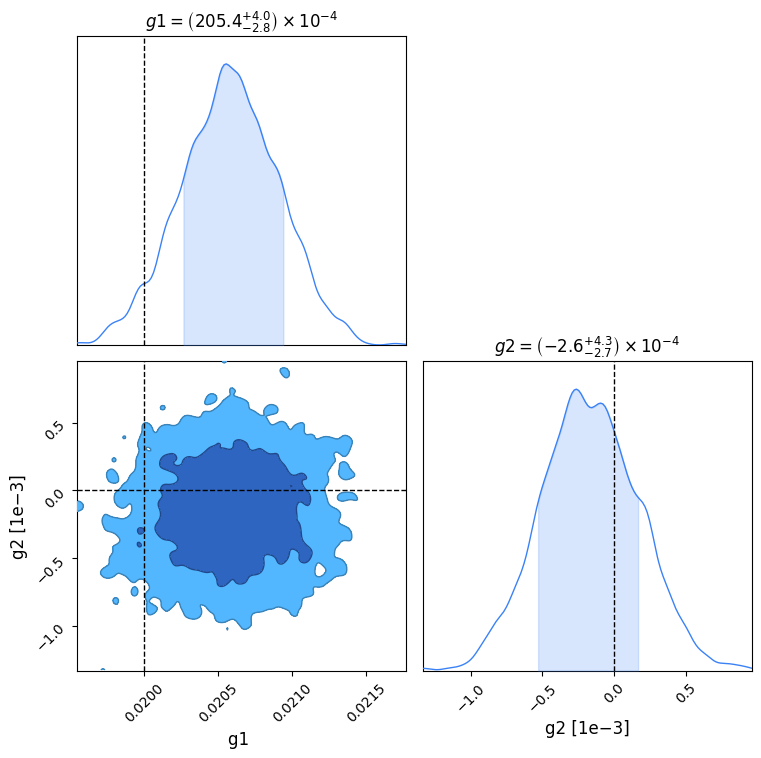

In [20]:
data1 = {"g1": gp[:, 0], "g2": gp[:, 1]}
df1 = pandas.DataFrame.from_dict(data1)


c = ChainConsumer()
chain = Chain(
    samples=df1,
    name="0",
)

c.add_chain(chain)
c.set_override(ChainConfig(sigmas=[0, 1, 2]))
c.add_truth(
    Truth(
        location={"g1": 0.02, "g2": 0.0},
        color="k",
        line_width=1.0,
    )
)

fig = c.plotter.plot(figsize=(8, 8))


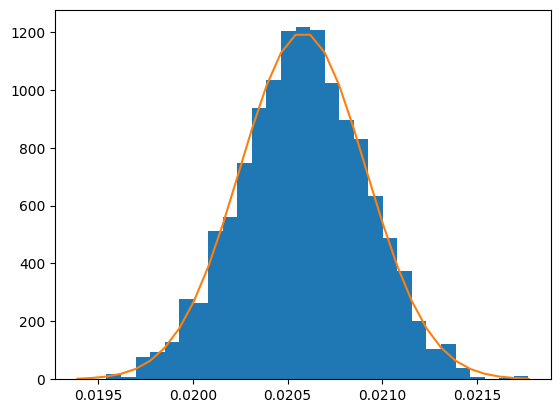

In [99]:
from scipy import stats


g1 =gp[:,0]
mu = g1.mean()
sigma = g1.std()
_, bins, _  = plt.hist(g1, bins=31, density=True)
plt.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma))

In [19]:
# correlation
np.corrcoef(gp[:, 0], gp[:, 1])

array([[1.        , 0.03839835],
       [0.03839835, 1.        ]])

In [22]:
gp2.shape

(500, 1000, 2)

Parameter g1 in chain 1 is not constrained


[[1.         0.03196748]
 [0.03196748 1.        ]]


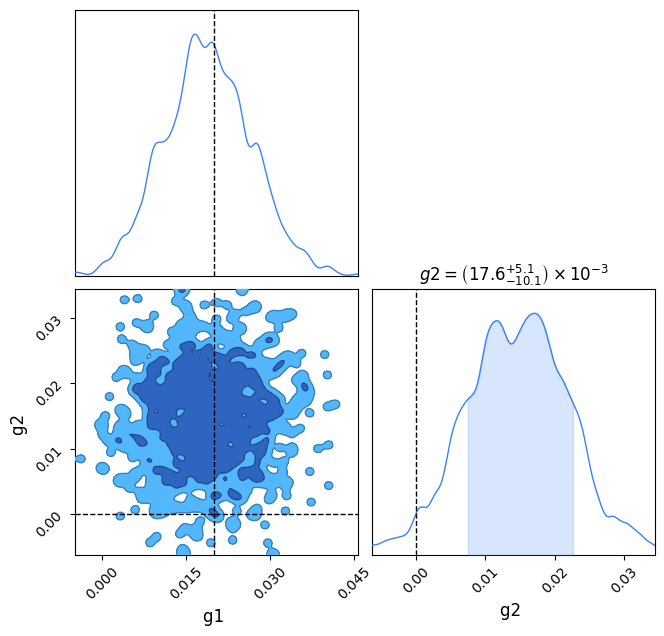

In [104]:
## random example from chunks 
idx = np.random.randint(0, 500)

data1 = {"g1": gp2[idx,:, 0], "g2": gp2[idx, :, 1]}
df1 = pandas.DataFrame.from_dict(data1)


c = ChainConsumer()
chain = Chain(
    samples=df1,
    name="1",
)

c.add_chain(chain)
c.set_override(ChainConfig(sigmas=[0, 1, 2]))
c.add_truth(
    Truth(
        location={"g1": 0.02, "g2": 0.0},
        color="k",
        line_width=1.0,
    )
)

fig = c.plotter.plot(figsize=(7, 7))

print(np.corrcoef(gp2[idx, :, 0], gp2[idx, :, 1]))


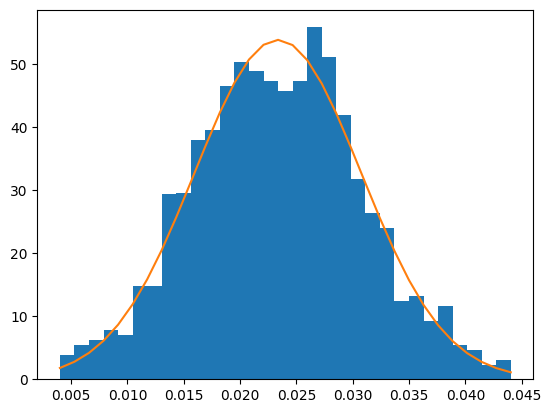

In [98]:
from scipy import stats


idx = np.random.randint(0, 500)
g1 =gp2[idx, :,0]
mu = g1.mean()
sigma = g1.std()
_, bins, _  = plt.hist(g1, bins=31, density=True)
plt.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma))